### Challenge Set 2  
Topic:        Exploring Movie Data  
Date:         10/1/2016  
Name:         Kevin Du  
Worked with:  

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import dateutil
import seaborn as sns
import datetime

%matplotlib inline

df = pd.read_csv('/Users/kevin/sf16_ds4/challenges/02-pandas/2013_movies.csv')
df['ReleaseDate'] = df.ReleaseDate.apply(dateutil.parser.parse)
df.dropna(inplace=True)

# 2.1

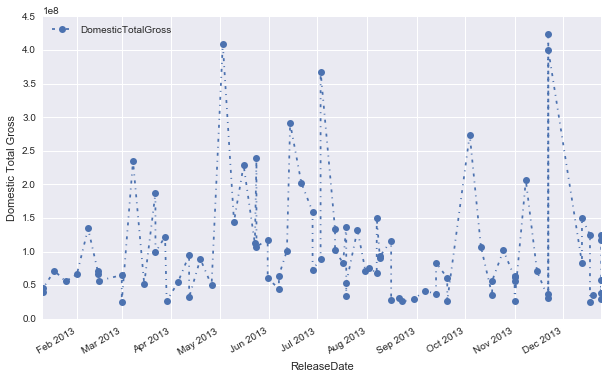

In [3]:
# 2.1

df.plot("ReleaseDate", "DomesticTotalGross", marker="o", linestyle="-.", figsize=(10, 6))
plt.ylabel('Domestic Total Gross')


#df.sort_values("ReleaseDate", inplace=True)
#plt.plot(df.ReleaseDate, df.DomesticTotalGross)


# 2.2

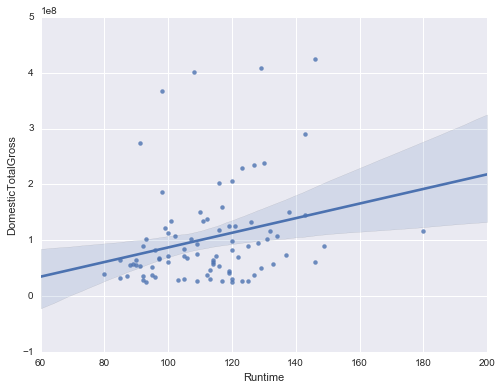

In [4]:
# 2.2

plt.figure(figsize=(8, 6))
sns.regplot(df.Runtime, df.DomesticTotalGross)

# 2.3

In [5]:
# 2.3

df.groupby('Rating').mean()

,Budget,DomesticTotalGross,Runtime
Rating,,,
PG,9.507143e+07,1.319459e+08,100.285714
PG-13,9.877500e+07,1.177266e+08,117.350000
R,3.886364e+07,7.422795e+07,111.939394


# 2.4

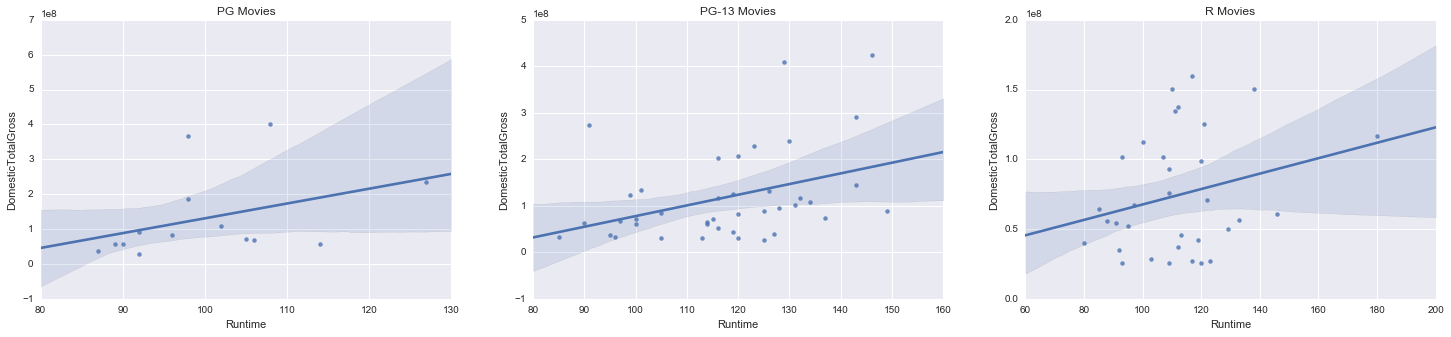

In [7]:
# 2.4

# df.groupby(['Rating', 'Title', 'ReleaseDate']).sum().reset_index()
df_pg = df.loc[df.Rating == 'PG']
df_pg13 = df.loc[df.Rating == 'PG-13']
df_r = df.loc[df.Rating == 'R']

plt.figure(figsize=(25,5))
plt.subplot(131)
plt.title('PG Movies')
plt.xlabel('Runtime')
plt.ylabel('Domestic Total Gross')
sns.regplot(df_pg.Runtime, df_pg.DomesticTotalGross)

plt.subplot(132)
plt.title('PG-13 Movies')
plt.xlabel('Runtime')
plt.ylabel('Domestic Total Gross')
sns.regplot(df_pg13.Runtime, df_pg13.DomesticTotalGross)

plt.subplot(133)
plt.title('R Movies')
plt.xlabel('Runtime')
plt.ylabel('Domestic Total Gross')
sns.regplot(df_r.Runtime, df_r.DomesticTotalGross)


# 2.5

In [12]:
# 2.5
df.groupby('Director').sum().sort_values(by='DomesticTotalGross', ascending = False).head(1).index[0]

'Francis Lawrence'

# 2.6

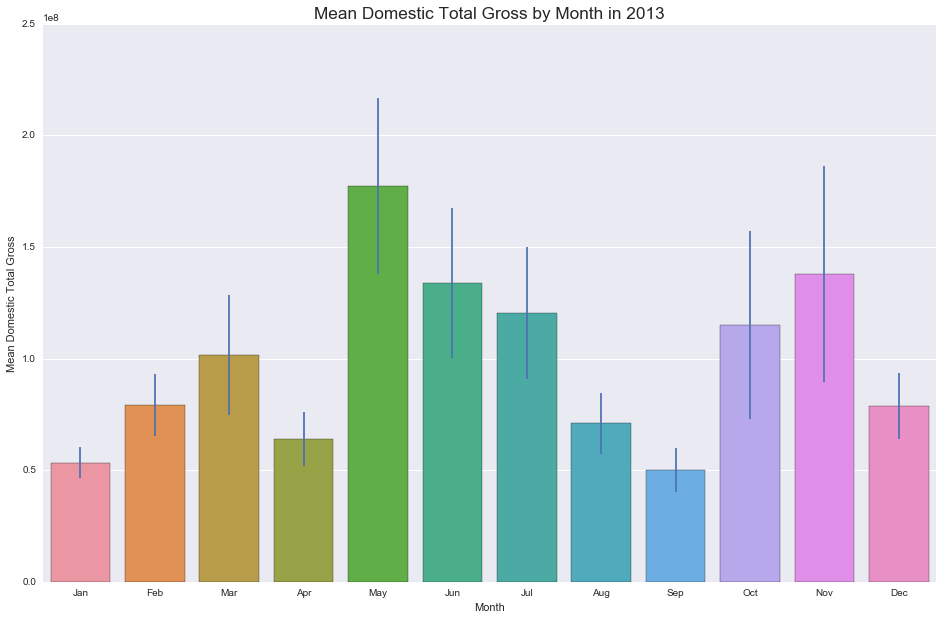

In [78]:
# 2.6

# Calculate the Standard Error of the Means
df2 = df.groupby([pd.Grouper(key='ReleaseDate', freq='M'),]).aggregate(['count', 'std'])
df2 = df2.DomesticTotalGross.reset_index()
df2['SEM'] = df2['std']/df2['count']**0.5

# Plot the graph by month
df_month = df.groupby([pd.Grouper(key='ReleaseDate', freq='M')]).mean()
plt.figure(figsize =(16,10))
plt.title('Mean Domestic Total Gross by Month in 2013', size= 'xx-large')
sns.barplot(df_month.index, df_month.DomesticTotalGross, yerr=df2.SEM, capsize=2, errwidth=2)\
.set(ylabel = 'Mean Domestic Total Gross', xlabel = 'Month',\
     xticklabels = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']);